<a href="https://colab.research.google.com/github/pavaniParjapnoar11/DRDO_assignment/blob/main/CustomerReviewPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from io import StringIO

#Dataset Description
The women's e-commerce clothing review dataset likely comes from a shopping website and includes details about clothes people bought.

1. **Unnamed:**This column is like an ID or number for each row. It helps identify and keep track of different reviews.

2. **Clothing ID:** Each piece of clothing gets a unique ID.a code that distinguishes one item from another.

3. **Age:** Age column helps understand the perspective of different age groups.

4. **Title:** The title is a short description that the reviewer gave  to summarize their thoughts about the clothing.

5. **Review Text:** Main part of the review where the person writes about their experience with the clothing—what they liked or didn't like.

6. **Rating:** The reviewer's score  to show how much they liked the clothing.

7. **Recommended IND:** Whether the reviewer recommends the clothing or not.

8. **Positive Feedback Count:** How many positive responses or likes the review got from other people.

9. **Division Name:** How the company divides or categorizes its clothing.

10. **Department Name:** Similar to the division, this column tells us which department or category the clothing belongs to, like dresses, shoes, etc.

11. **Class Name:** It specifies the specific class or type of clothing being reviewed, providing more details about the product.

12. **Sentiment:**Summary of the overall sentiment of the review—whether it's positive, negative, or neutral.

Read the Data

In [ ]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#Data Preprocessing

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#here seprate rating and recommand ind from data and count recommend ind for 0 1 for each rating

df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    806
        1                     15
2       0                   1455
        1                     94
3       0                   1653
        1                   1170
4       0                    164
        1                   4744
5       0                     23
        1                  12517
Name: Recommended IND, dtype: int64

In [ ]:
text_df = df[['Title', 'Review Text', 'Recommended IND']]
text_df.head()

,Title,Review Text,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,1
1,NaN,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws,I had such high hopes for this dress and reall...,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1
4,Flattering shirt,This shirt is very flattering to all due to th...,1


In [ ]:
#here add title with review text for show a one label name Review

text_df['Review'] = text_df['Title'] + ' ' + text_df['Review Text']
text_df = text_df.drop(labels=['Title','Review Text'] , axis=1)
text_df.head()

<ipython-input-36-2a9f1d66db47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['Review'] = text_df['Title'] + ' ' + text_df['Review Text']


,Recommended IND,Review
0,1,NaN
1,1,NaN
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...


In [ ]:
#swap Recommended IND with Recommended name

text_df = text_df.rename(columns={"Recommended IND": "Recommended"})

In [ ]:
#check for nan value in Review is 3811 nan value

text_df.Review.isna().sum()

2966

In [ ]:
#print shape of two columns Recommended and review

print("My data's shape is:", text_df.shape)
text_df.head()

My data's shape is: (22641, 2)


,Recommended,Review
0,1,NaN
1,1,NaN
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...


In [ ]:
#here drop duplicates values in data

print("Before dropping text_df: ",text_df.shape)
text_df.drop_duplicates(inplace = True)
print("After dropping text_df: ",text_df.shape)

Before dropping text_df:  (22641, 2)
After dropping text_df:  (19673, 2)


In [ ]:
text_df.isnull().sum(axis=0).sort_values()

Recommended    0
Review         2
dtype: int64

In [ ]:
text_df.dropna(inplace=True)
text_df.head()
print("After dropping NaN text_df: ",text_df.shape)

After dropping NaN text_df:  (19671, 2)


In [ ]:
text_df['Recommended'].value_counts()

1    16096
0     3575
Name: Recommended, dtype: int64

<Axes: ylabel='Recommended'>

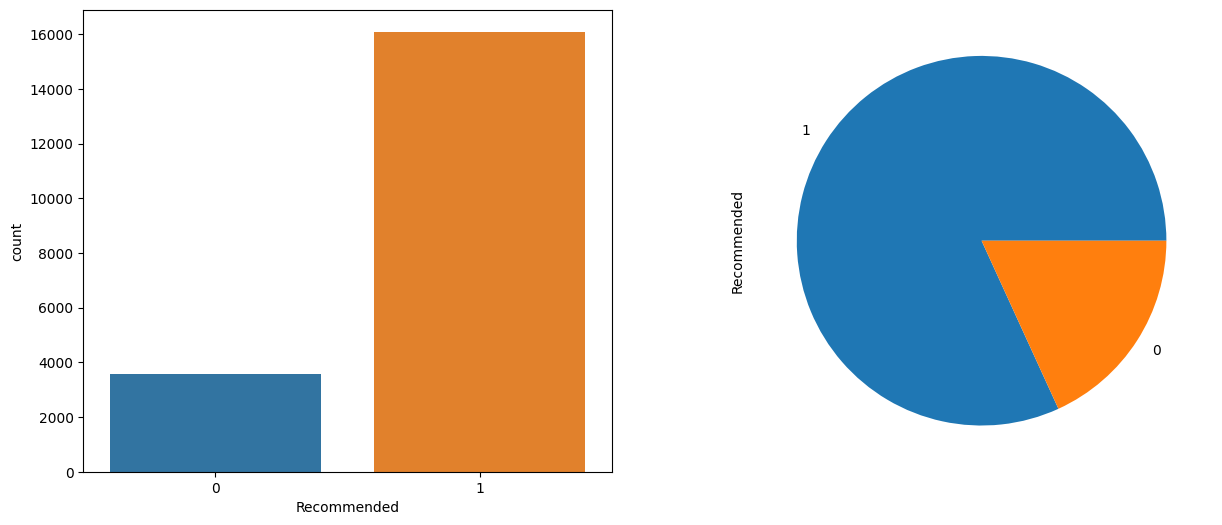

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=text_df['Recommended'])
plt.subplot(1, 2, 2)
text_df['Recommended'].value_counts().plot.pie(y='Class')

#Upsampling

We are addressing the imbalance in your binary classification dataset, which contains instances labeled as "Recommended" and "Not Recommended." The dataset is divided into two DataFrames, one for each class. To mitigate the imbalance, you've chosen to upsample the minority class (instances where products are not recommended) using the resample function from the sklearn.utils module. This involves randomly duplicating instances from the minority class to match the size of the majority class. The resulting upsampled minority class is then combined with the original majority class, creating a new balanced DataFrame (df_upsampled). By doing this, we aim to provide  machine learning model with a more equitable representation of both classes during training, potentially improving its ability to make accurate predictions, especially for the less frequent class.

In [ ]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df_majority = text_df[(text_df['Recommended']==1)]
df_minority = text_df[(text_df['Recommended']==0)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class
                                 random_state=42)  # reproducible resultes

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<Axes: ylabel='Recommended'>

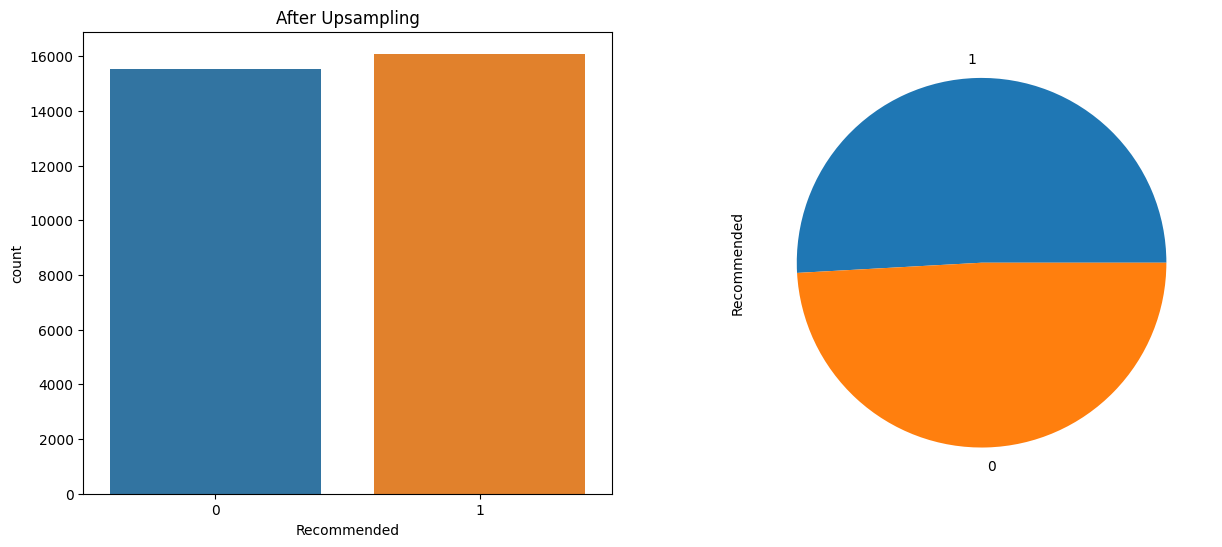

In [ ]:
plt.figure(figsize = (15, 6))
ax=plt.subplot(1, 2, 1)
sns.countplot(x=df_upsampled['Recommended'])
ax.set_title('After Upsampling')
plt.subplot(1, 2, 2)
df_upsampled['Recommended'].value_counts().plot.pie(y='Class')

In [ ]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
import numpy as np
import re
df_upsampled["Cleaned_Review"] = np.vectorize(remove_pattern)(df_upsampled["Review"], "@[\w]*")


In [ ]:
#Remove special characters, numbers and punctuations
df_upsampled["Cleaned_Review"] = df_upsampled["Cleaned_Review"].str.replace("[^a-zA-Z#]", " ")
df_upsampled.head()

<ipython-input-56-a60186f2047d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_upsampled["Cleaned_Review"] = df_upsampled["Cleaned_Review"].str.replace("[^a-zA-Z#]", " ")


,Recommended,Review,Cleaned_Review
20700,0,Very large; lace is kinda coarse Thought i'd l...,Very large lace is kinda coarse Thought i d l...
23020,0,Way too much fabric I wanted to love this jump...,Way too much fabric I wanted to love this jump...
5625,0,So surprised by the poor quality I loved the l...,So surprised by the poor quality I loved the l...
8695,0,"Runs large I so wanted to love this tank, and ...",Runs large I so wanted to love this tank and ...
7689,0,"If you have a chest, beware I got this top in ...",If you have a chest beware I got this top in ...


#Tokenization

In the code, we use tokenization to transform the cleaned reviews from our upsampled dataset into individual words or tokens. This is important because many machine learning models, especially those dealing with text, need data to be organized in a structured way. Tokenization breaks down the reviews into separate words, allowing the model to understand and learn from the language patterns. Each word becomes a feature that the model can use to make predictions or understand the sentiment of the reviews. It's like breaking a sentence into smaller pieces so that a computer can easily analyze and make sense of the words, helping us in tasks like predicting whether a product is recommended or not based on customer reviews.

In [ ]:
tokenized_tweet = df_upsampled["Cleaned_Review"].apply(lambda x: x.split())
tokenized_tweet.head()

20700    [Very, large, lace, is, kinda, coarse, Thought...
23020    [Way, too, much, fabric, I, wanted, to, love, ...
5625     [So, surprised, by, the, poor, quality, I, lov...
8695     [Runs, large, I, so, wanted, to, love, this, t...
7689     [If, you, have, a, chest, beware, I, got, this...
Name: Cleaned_Review, dtype: object

#Data Visualization

Count of how many times each distinct rating appears in the "Rating" column.

In [ ]:
df["Rating"].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

<Axes: ylabel='Rating'>

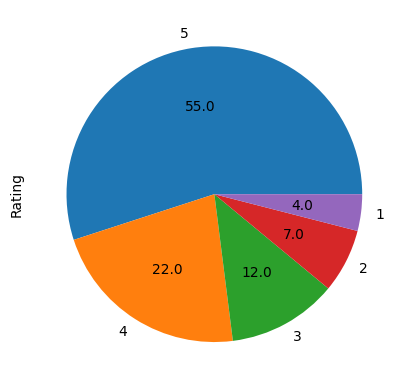

In [ ]:
round(df['Rating'].value_counts()/df.shape[0]*100).plot.pie(autopct='%1.1f')


Understanding the distribution of products or reviews across different departments

In [ ]:
df["Department Name"].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

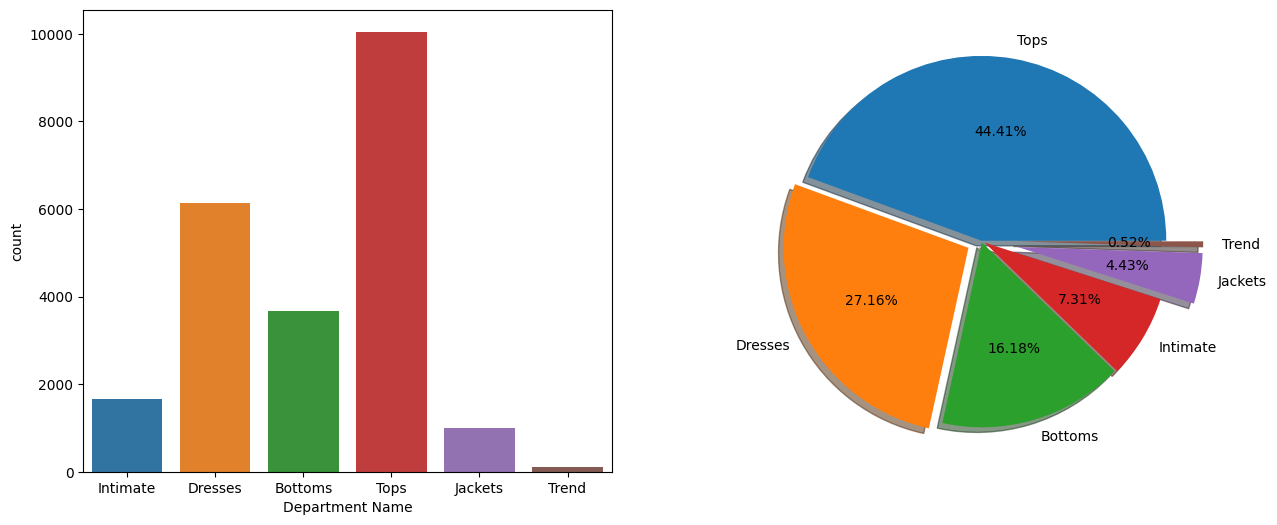

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Department Name'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Department Name'].value_counts(),labels=('Tops','Dresses',"Bottoms","Intimate","Jackets","Trend") ,explode = (0, 0.08, 0.01,0.02,0.2,0.2), shadow = True, autopct = '%1.2f%%')

plt.show()

<ipython-input-62-ff1bb4ff98c0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']).set_title("Age Distribution")


Text(0.5, 1.0, 'Age Distribution')

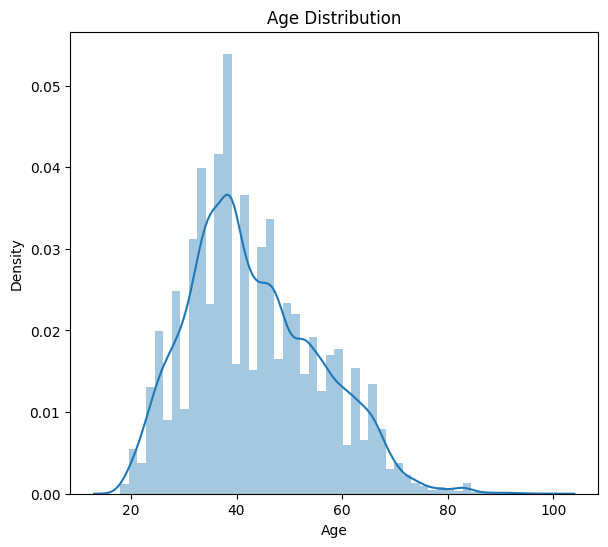

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Age_distribution')
sns.distplot(df['Age']).set_title("Age Distribution")

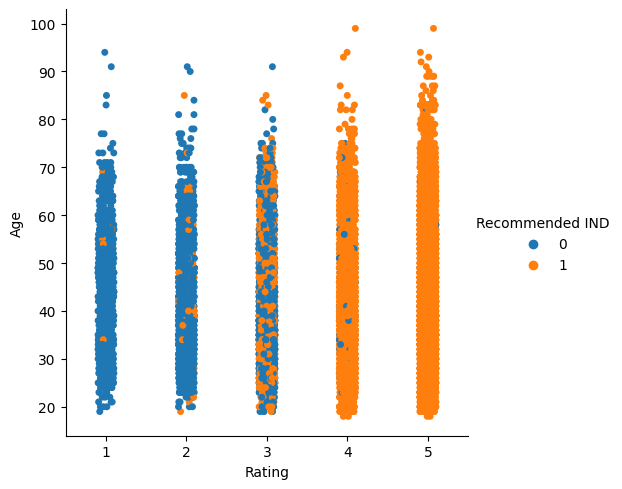

In [ ]:
sns.catplot(x="Rating", y="Age", hue="Recommended IND",data= df)

In [ ]:
import plotly.express as px
FreqOfWords = df['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1000, height=600)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Noise Removal/Data Cleaning
Data cleaning is essential to prepare the text data for meaningful analysis and machine learning applications. The process involves removing punctuation, tokenizing the text into individual words, eliminating numeric values, removing common stop words, and lemmatizing words to their base forms

In [ ]:
#this function use to remove punctuations
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

In [ ]:
# processed_text=remove_punc(str(df["Review Text"]))
# processed_text
processed_text=remove_punc(str(df_upsampled["Cleaned_Review"]))
processed_text

'20700    Very large  lace is kinda coarse Thought i d l\n23020    Way too much fabric I wanted to love this jump\n5625     So surprised by the poor quality I loved the l\n8695     Runs large I so wanted to love this tank  and \n7689     If you have a chest  beware I got this top in \n                                                       \n23479    What a fun piece  So i wasn t sure about order\n23481    Great dress for many occasions I was very happ\n23482    Wish it was made of cotton It reminds me of ma\n23484    Very cute dress  perfect for summer parties an\n23485    Please make more like this one  This dress in \nName Cleaned_Review Length 31635 dtype object'

In [ ]:
def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

In [ ]:
tokenized_data=tokenizze(processed_text.lower())
#tokenized_data

In [ ]:
def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num

In [ ]:
textwithoutnum= remove_num(tokenized_data)
#textwithoutnum

In [ ]:
def remove_stops(df):

    newdata=[t for t in df if t not in new_stopping_words]
    return newdata

In [ ]:
data=remove_stops(textwithoutnum)
#data

In [ ]:
def lemmatizze(df):


    newdata= [WordNetLemmatizer().lemmatize(t) for t in df]
    return newdata

In [ ]:
nltk.download('wordnet')
final_data=lemmatizze(data)
#final_data

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
joined_data=" ".join(final_data)

In [ ]:
joined_data

'large lace kinda coarse thought l way much fabric wanted love jump surprised poor quality loved l run large wanted love tank chest beware got top fun piece wasn sure order great dress many occasion happ wish made cotton reminds ma cute dress perfect summer party please make like one dress name length dtype object'

In [ ]:
def Cleaning_process(df):
    processed_text=remove_punc(str(df))
    tokenized_data=tokenizze(processed_text.lower())
    textwithoutnum= remove_num(tokenized_data)
    data=remove_stops(textwithoutnum)
    final_data=lemmatizze(data)
    return " ".join(final_data)

In [ ]:
text = Cleaning_process(str(df_upsampled["Cleaned_Review"]))
text

'large lace kinda coarse thought l way much fabric wanted love jump surprised poor quality loved l run large wanted love tank chest beware got top fun piece wasn sure order great dress many occasion happ wish made cotton reminds ma cute dress perfect summer party please make like one dress name length dtype object'

In [ ]:
df_upsampled["Cleaned_Review"]= df_upsampled["Cleaned_Review"].apply(Cleaning_process)


#Word Cloud



Word cloud visualization is to highlight the most frequently occurring words in the "Cleaned_Review" column of the upsampled dataset (df_upsampled). The code first combines all the cleaned reviews into a single string, and then utilizes the WordCloud class from the wordcloud library to create the visualization. Parameters such as background color, dimensions, and maximum font size are specified for customization. The resulting word cloud is a visual representation where the size of each word corresponds to its frequency in the reviews. The larger and bolder a word appears, the more frequently it occurs in the dataset. This type of visualization is valuable for quickly identifying key terms and gaining insights into the prevalent themes or sentiments within the upsampled dataset, making it a useful tool for exploratory data analysis and understanding the textual patterns in the reviews

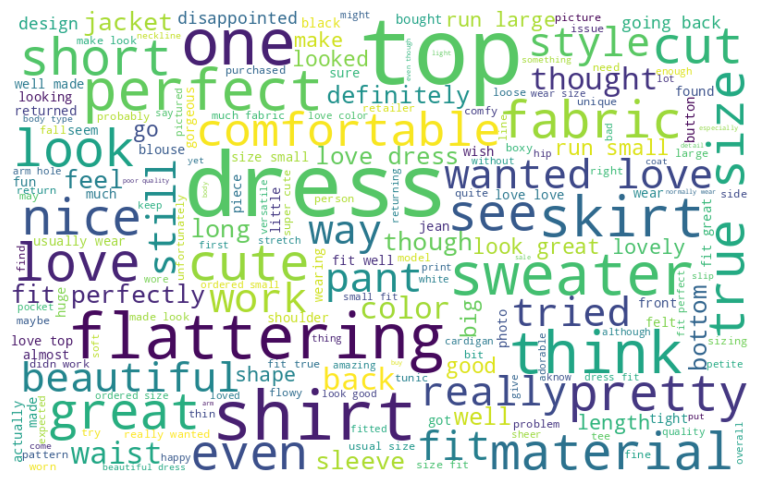

In [ ]:
#Visualizing the Keywords
all_words = " ".join([sentence for sentence in df_upsampled["Cleaned_Review"]]) #Combines all the sentences into a single string

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#Plotting the graph
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#Splitting Data for train and test

we are preparing your text data for machine learning using a combination of scikit-learn and TensorFlow's Keras. Firstly, we use scikit-learn's TfidfVectorizer to convert text data into TF-IDF features. This involves splitting your data into training and testing sets with train_test_split. Then, we use TensorFlow's Keras Tokenizer to convert the text into sequences of integers, setting a maximum vocabulary size. To ensure uniform input lengths for a neural network, we apply padding using pad_sequences. Finally, we split  data again with train_test_split, this time using the padded sequences (xpad) as features and the target variable (y). The stratify parameter maintains the class distribution in the training and testing sets.

In [ ]:
#importing
from sklearn.model_selection import train_test_split

#from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF are word frequency

In [ ]:
x = df_upsampled["Cleaned_Review"]
y= df_upsampled["Recommended"]

In [ ]:
#tokenization

from keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)
xtokens= tokenizer.texts_to_sequences(x)

In [ ]:
#padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen=50
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

In [ ]:
#train_test splot
x_train, x_test, y_train, y_test = train_test_split(xpad, y, test_size=0.2, stratify=y,random_state=42)


#Random Forest Classifier

The RandomForestClassifier works like a team of decision-makers analyzing women's clothing reviews. Each "decision-maker" (tree) looks at a random part of the reviews and considers different aspects to decide whether a product is recommended or not. By combining the decisions of all these "team members," the classifier provides a final prediction for each review. During training, the classifier learns from known reviews to make better decisions. When given new reviews, it uses this knowledge to predict whether the products are recommended. The evaluation metrics like accuracy and F1 score help us understand how well the team is performing in classifying reviews, making it a versatile and effective tool for understanding and categorizing feedback.

In [ ]:
accuracy_list = []
f1_list = []
roc_auc_list = []

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [ ]:
def result(model):

    #fit on data
    model.fit(x_train, y_train)

    #prediction
    pred = model.predict(x_test)

    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()

    #accuracy of model
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()

    #f1-score of model
    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    #roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()

    #confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
#     plt.title('Confusion Matrix', fontsize=20)


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3108
           1       0.97      0.98      0.98      3219

    accuracy                           0.98      6327
   macro avg       0.98      0.98      0.98      6327
weighted avg       0.98      0.98      0.98      6327

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.975343764817449
----------------------------------------------------------------------------------------------------

F1 Score:  0.9758214507129572
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9758214507129572
----------------------------------------------------------------------------------------------------



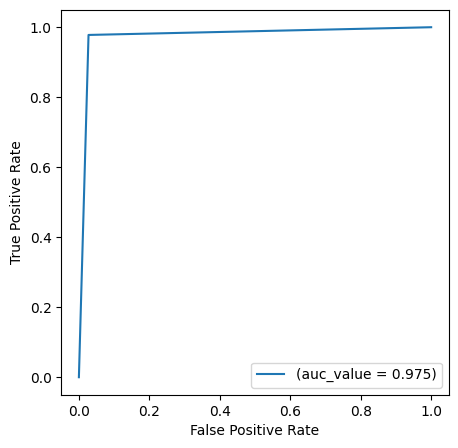


Confusion Matrix: 


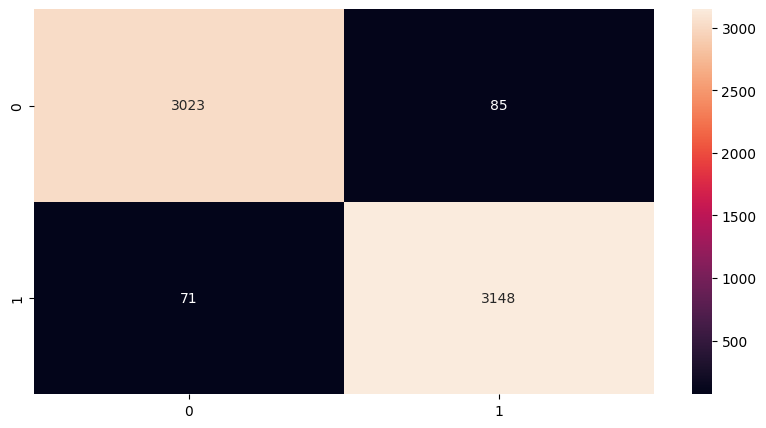

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', random_state = 42)
result(rf)

#RESULTS WITH USER INPUT

In [ ]:
# User input for prediction
user_input = input("Enter a product review: ")
user_input_vectorized = vectorizer.transform([user_input])

# Make prediction
prediction = model.predict(user_input_vectorized)

# Output the result
print(f"Predicted Sentiment: {prediction[0]}")

Enter a product review: i am disappointed with the product
Predicted Sentiment: Negative


#CONCLUSION:
RandomForestClassifier did an excellent job in figuring out whether women's clothing products are recommended based on customer reviews. we got an accuaracy  about 97.5%  which is pretty impressive. It balanced well between correctly identifying recommended and not recommended products. The model seems to be good at spotting both positive and negative aspects of the reviews. So,we can use this model to classify the customers reviews.